Compare two algorithms: Weighted Moving Average (selecting weights based on a Gaussian function)
and Exponential Moving Average. Using these algorithms, demonstrate the extraction of regular signal
components (trends, periodicity or quasi-periodicity, etc.) in a signal, the possibilities of reducing existing
or artificially added noises and possible failures. Also compare the results obtained by computing with
different algorithm parameters 𝐾 and 𝐿 (in the case of weighted moving averaging) and 𝛼 (in the case of
exponential moving averaging). In your Report, provide a complete analysis (consisting of all the above
mentioned studies) for only one selected signal (for which you consider the most representative results),
For other signals studied, the Report may not include illustrations of all the studies (however, you may be
asked to demonstrate the operation of the omitted studies on a computer screen during the discussion).

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


datasets:

    - data1 - SP500 daily values from 2014 to 2024 https://fred.stlouisfed.org/series/SP500

    - data2 - Unemployment rates from 1948 to 2024 https://fred.stlouisfed.org/series/UNRATE 

    - data3 - US GDP quarterly from 1947 to 2024 https://fred.stlouisfed.org/series/GDP

    - data4 - Average sales price for houses https://fred.stlouisfed.org/series/ASPUS
    
    - data5 - personal saving rate https://fred.stlouisfed.org/series/PSAVERT

In [29]:
df = pd.read_csv('data1.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df['SP500'] = pd.to_numeric(df['SP500'], errors='coerce')
df.dropna(inplace=True)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2517 entries, 0 to 2608
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    2517 non-null   datetime64[ns]
 1   SP500   2517 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


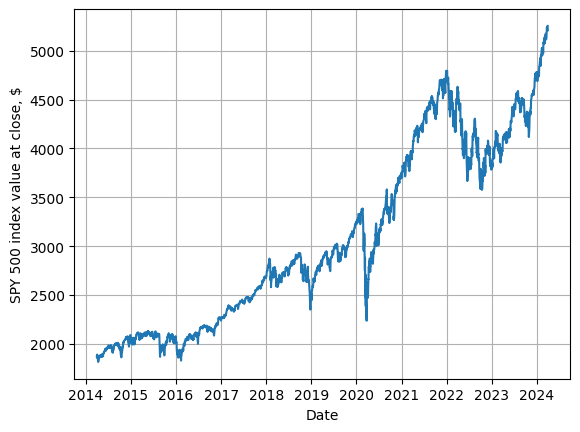

In [64]:
plt.figsize=(20,10)
plt.grid(which='both')
plt.plot(df['DATE'],df['SP500'])
plt.xlabel('Date')
plt.ylabel('SPY 500 index value at close, $')
plt.savefig('report/images/SP500.png')

In [100]:
    
def gaussian_distribution(x):
    return 1/(np.sqrt(2*np.pi)) * np.exp(-((x**2)/2))      
        
        
def get_weights(L,K):
    
    #boundary value for weights
    x_k = np.sqrt(2*np.log(L))
    
    #creating X axis for gaussian weight distribution
    K_j = np.linspace(-K,K,2*K+1)
    
    
    #distributing weights along X axis
    x_j = [x_k * j/K for j in K_j]
    
    # applying gaussian distribution to weights
    p_j = [gaussian_distribution(x) for x in x_j]
    
    #normalization of weights
    w_j = [p/sum(p_j) for p in p_j]
    return K_j,w_j,p_j
        
        
K_j,weights,p_j = get_weights(L,K)

def plot_weights(K_j,weights):
    # Plot the marker point
    plt.plot(K_j, weights, 'o', color='red',markersize=7,markeredgecolor='black')

    # Draw a line from the marker point to the x-axis

    for i in range(len(K_j)):
        plt.plot([K_j[i], K_j[i]], [weights[i], 0], color='black', linestyle='--', linewidth=1)
        
    plt.grid(which='minor')
    # Show the plot
    plt.title('Gaussian normalized Weights Distribution')
    plt.ylim(0,max(weights)+min(weights))
    plt.savefig('report/images/weights.png')
    plt.show()
    return None

def apply_weights(data, weights):
    weighted_data = 0
    #print(len(data),len(weights))
    for i in range(len(data)):
        weighted_data += data[i] * weights[i]
    return weighted_data

def weighted_moving_average(data, L, K):
    
    K_j,weights,p_j= get_weights(L,K)
    #plot_weights(K_j,weights=weights)
    weighted_data = np.zeros(len(data))
    
    for i in range(K, len(data) - K):
        window_data = data[i - K : i + K + 1]
        weighted_data[i] = apply_weights(window_data, weights)
    
    weighted_data = np.where(weighted_data == 0, np.nan, weighted_data)
    
    return weighted_data

In [101]:
df['weighted_moving_average'] = weighted_moving_average(df['SP500'].values, L = 10, K = 30)
df['weighted_moving_average'] = df['weighted_moving_average'].replace(0, np.nan)

In [102]:
def plot_averaged(x,y,z, title):
   # plt.figure(figsize=(20, 20))  # Set the figure size to 10 inches by 6 inches


   # Create the figure and axes
   fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 6))

   # Plot the xy data on the first subplot
   ax1.plot(x, y)
   ax1.set_xlabel('Date')
   ax1.set_ylabel('SPY 500 index value at close, $')
   ax1.grid(which='both')
   # Plot the xz data on the second subplot
   ax2.plot(x, z,color='red')
   ax2.set_xlabel('Date')
   ax2.grid(which='both')
   #ax2.set_ylabel('Z')

   # Adjust the spacing between subplots
   plt.savefig('report/images/'+title+'.png')
   plt.tight_layout()
   # Show the plots
   plt.show()


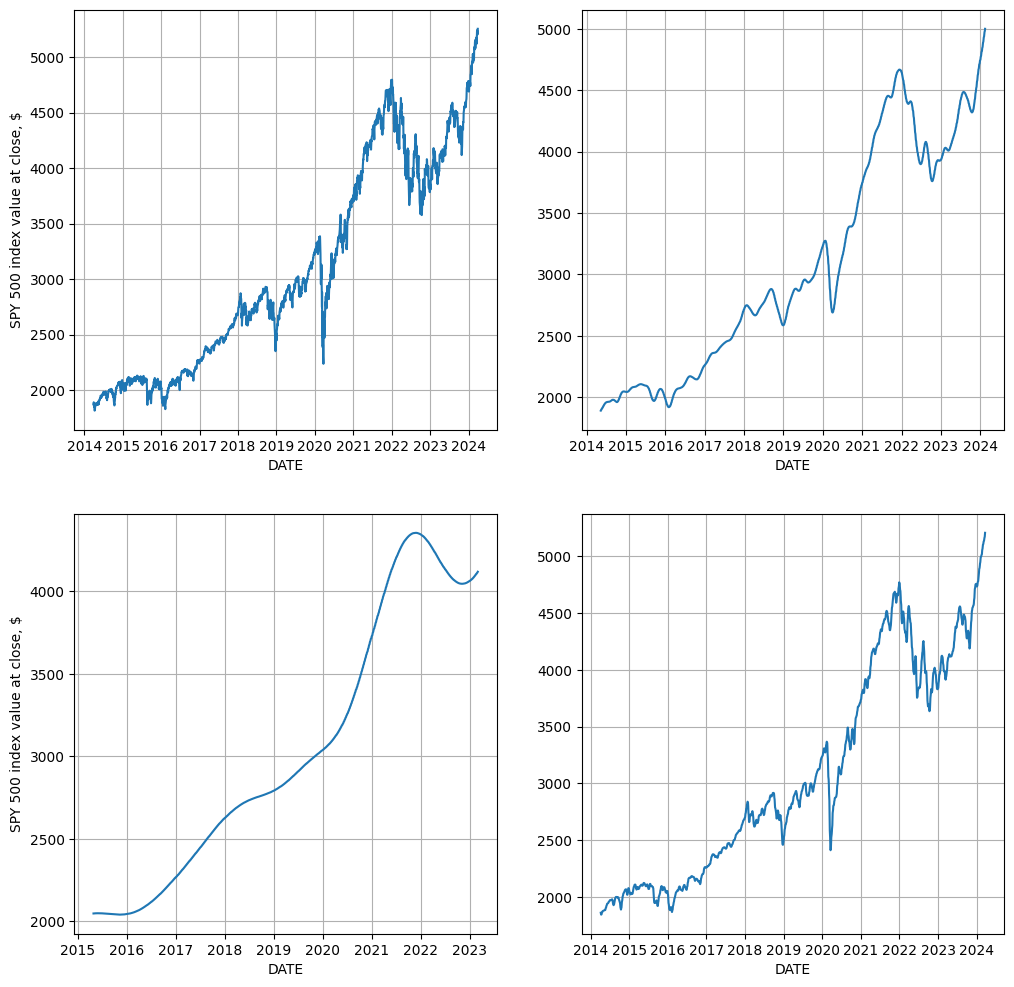

In [122]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
(ax1, ax2), (ax3, ax4) = axes

ax1 = sns.lineplot(x='DATE', y='SP500', data=df, ax=ax1)
ax1.grid(True)
ax1.set_ylabel('SPY 500 index value at close, $')
df['weighted_moving_average'] = weighted_moving_average(df['SP500'].values, L=10, K=30)
ax2 = sns.lineplot(x='DATE', y='weighted_moving_average', data=df, ax=ax2)
ax2.grid(True)
ax2.set_ylabel(' ')
df['weighted_moving_average'] = weighted_moving_average(df['SP500'].values, L=30, K=270)
ax3 = sns.lineplot(x='DATE', y='weighted_moving_average', data=df, ax=ax3)
ax3.grid(True)
ax3.set_ylabel('SPY 500 index value at close, $')
df['weighted_moving_average'] = weighted_moving_average(df['SP500'].values, L=5, K=5)
ax4 = sns.lineplot(x='DATE', y='weighted_moving_average', data=df, ax=ax4)
ax4.grid(True)
ax4.set_ylabel(' ')
plt.savefig('report/images/WMA_ex_1.png')
plt.show()

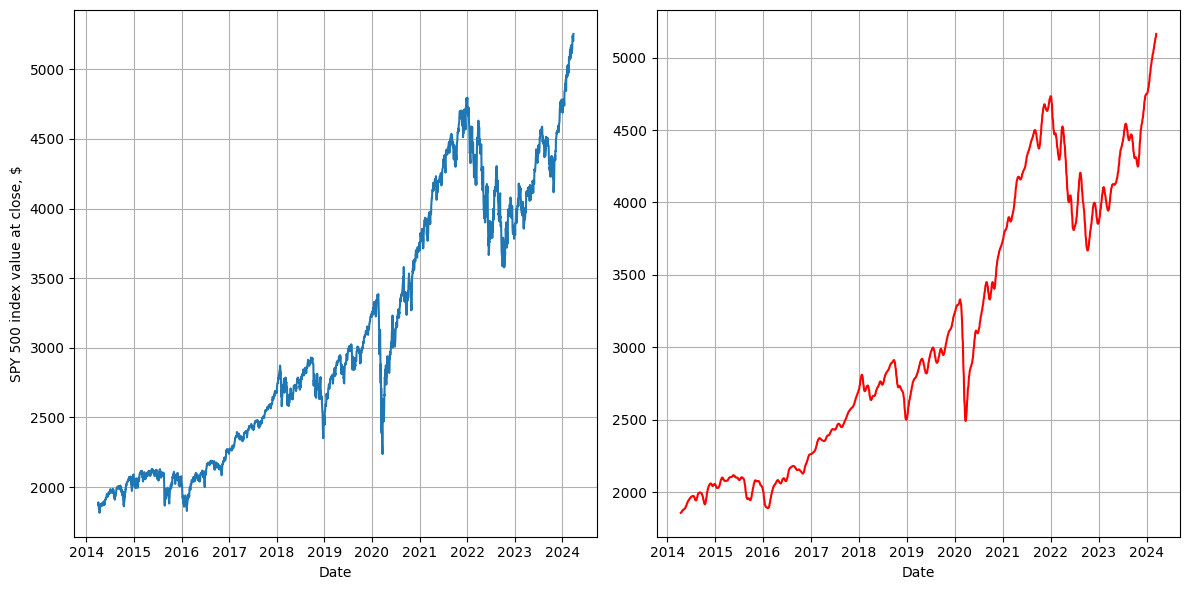

In [107]:
plot_averaged(df['DATE'],df['SP500'],df['weighted_moving_average'],'L10K30WMA')

In [38]:
def get_residuals(data, weighted_data):
    residuals = abs(data - weighted_data)
    return residuals

In [39]:
def exponential_moving_average(data, alpha):
    averaged_data = np.zeros(len(data))
    averaged_data[0] = data[0]
    
    for i in range(1, len(data)):
        averaged_data[i] = alpha * data[i] + (1 - alpha) * averaged_data[i - 1]
        
    return averaged_data

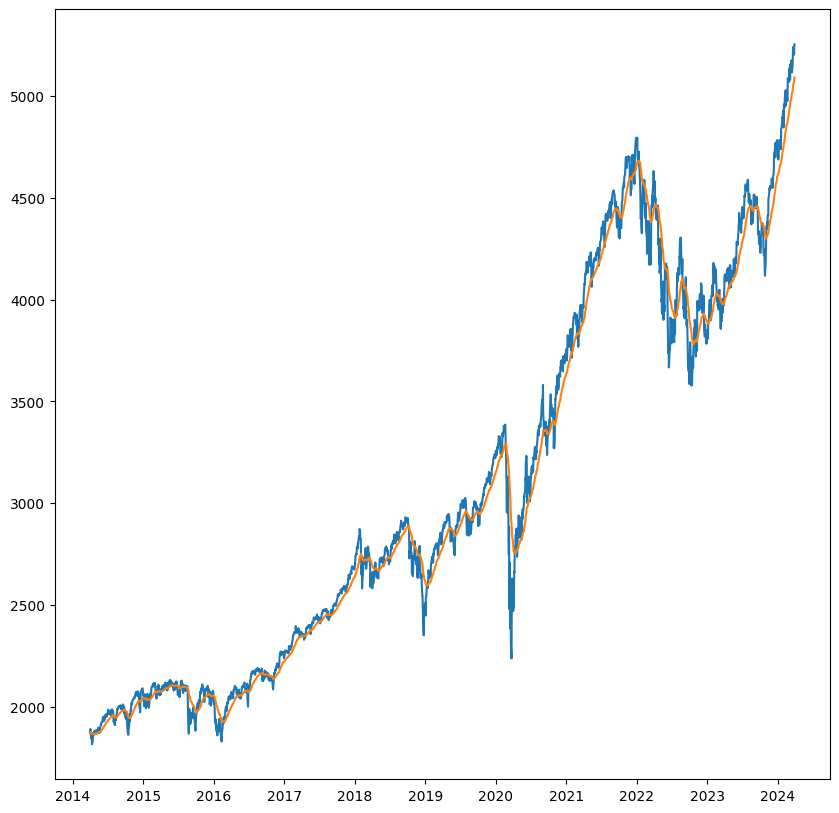

In [40]:
df['exponential_moving_average'] = exponential_moving_average(df['SP500'].values, alpha = 0.05)
plt.figure(figsize=(10, 10))  # Set the figure size to 10 inches by 6 inches
plt.plot(df['DATE'], df['SP500'])
plt.plot(df['DATE'], df['exponential_moving_average'])
plt.show()

In [41]:
df1 = pd.read_csv('data2.csv')
df1['DATE'] = pd.to_datetime(df1['DATE'])

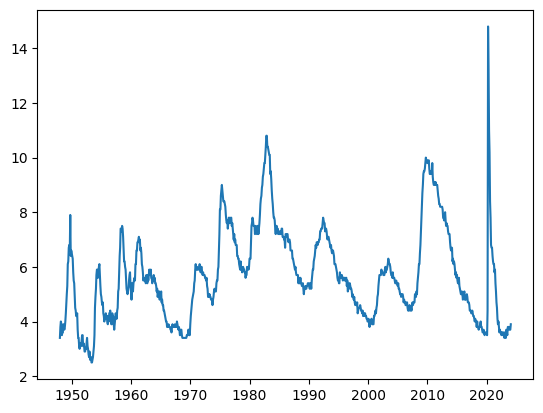

In [42]:
plt.plot(df1['DATE'],df1['UNRATE'])

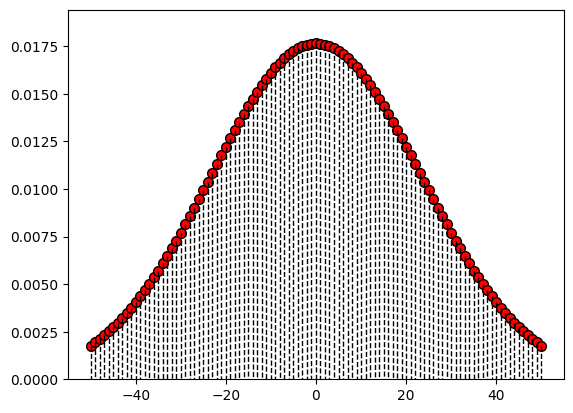

In [43]:
df1['weighted_moving_average'] = weighted_moving_average(df1['UNRATE'].values, L = 10, K = 50)

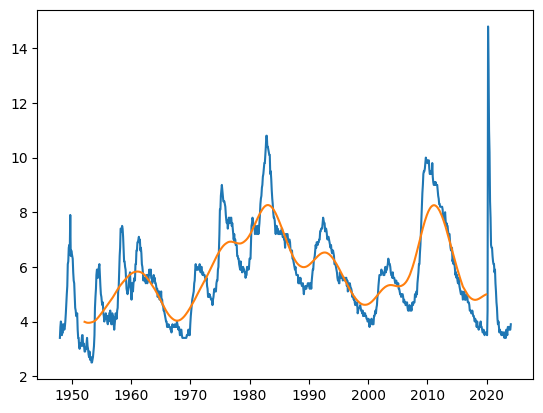

In [44]:
plt.plot(df1['DATE'],df1['UNRATE'])
plt.plot(df1['DATE'], df1['weighted_moving_average'])

In [45]:
df1['exponential_moving_average'] = exponential_moving_average(df1['UNRATE'].values, 0.1
                                                            )

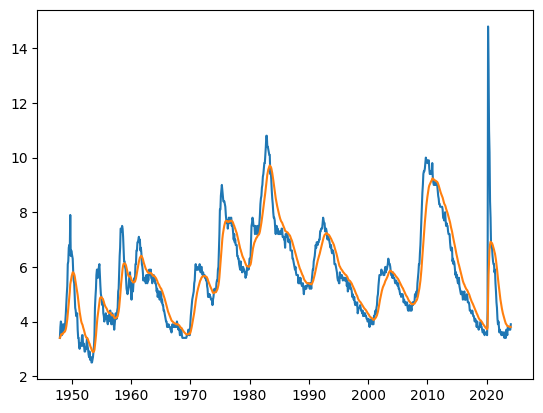

In [46]:
plt.plot(df1['DATE'], df1['UNRATE'])
plt.plot(df1['DATE'], df1['exponential_moving_average'])

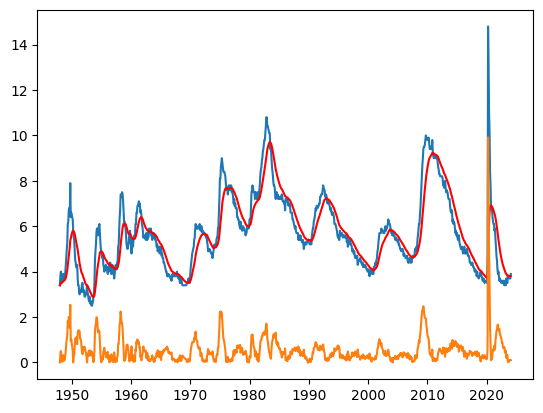

In [47]:
plt.plot(df1['DATE'],df1['UNRATE'])
plt.plot(df1['DATE'], df1['exponential_moving_average'],color='red')
df1['residuals'] = get_residuals(df1['UNRATE'].values, df1['exponential_moving_average'].values)
plt.plot(df1['DATE'], df1['residuals'])
#plt.plot([df1['DATE'],df1['DATE']], [df1['UNRATE'],df1['exponential_moving_average']],color='red')

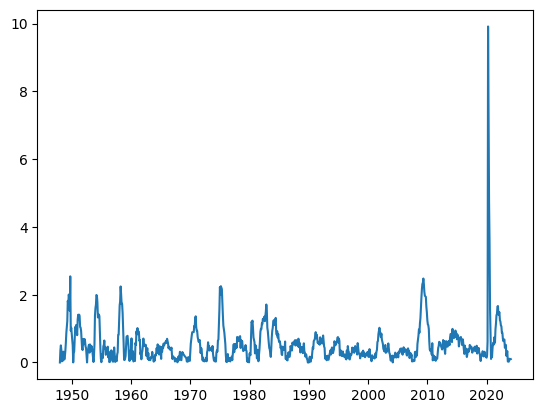

In [48]:
plt.plot(df1['DATE'],df1['residuals'])

Reportui:

Pasiaiskinti del kintamo alpha taikymo

gradiento variacija - kiek algoritmas paauga per iteracijas 

palyginti wma ir ema pagal trendu islaikyma

In [183]:

def compute_gradient_variance(data):
    gradient = np.gradient(data)
    gradient = np.where(np.isnan(data), np.nan, gradient)
    variance = np.nanvar(gradient)
    return gradient, variance


def calculate_correlation(original_data, averaged_data):
    original_data = np.nan_to_num(original_data)
    averaged_data = np.nan_to_num(averaged_data)
    
    if np.isnan(original_data).any() or np.isnan(averaged_data).any():
        return np.nan
    
    correlation = np.corrcoef(original_data, averaged_data)[0, 1]
    return correlation



Variance of the original signal: 566.3977747814032
Variance of the weighted moving average signal: 19.6779570506585


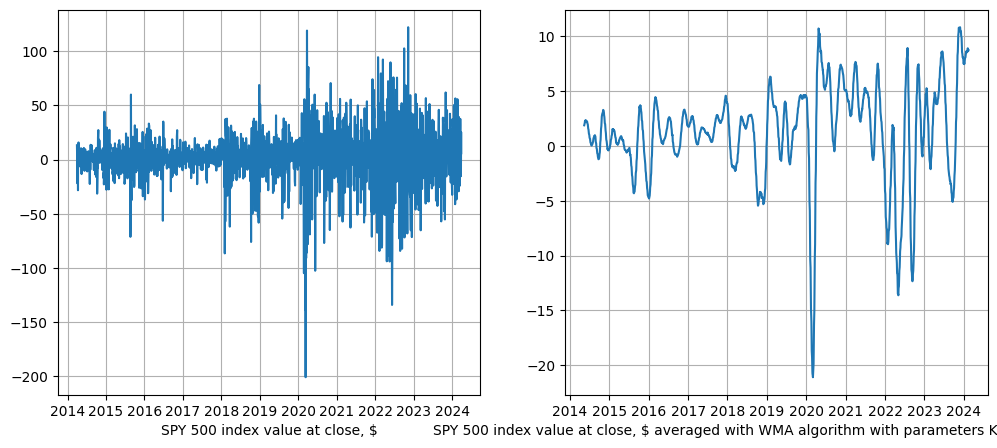

In [197]:
df['weighted_moving_average'] = weighted_moving_average(df['SP500'].values, L = 10, K = 30)

gradient,variance = compute_gradient_variance(df['SP500'])
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.plot(df['DATE'],gradient)
ax1.set_xlabel('SPY 500 index value at close, $')
print(f'Variance of the original signal: {variance}')
gradient,variance = compute_gradient_variance(df['weighted_moving_average'])
ax2.plot(df['DATE'],gradient)
ax2.set_xlabel('SPY 500 index value at close, $ averaged with WMA algorithm with parameters K = 30 and L = 10 ')
ax1.grid(True)
ax2.grid(True)

print(f'Variance of the weighted moving average signal: {variance}')
plt.savefig('report/images/WMA_ex_2.png')

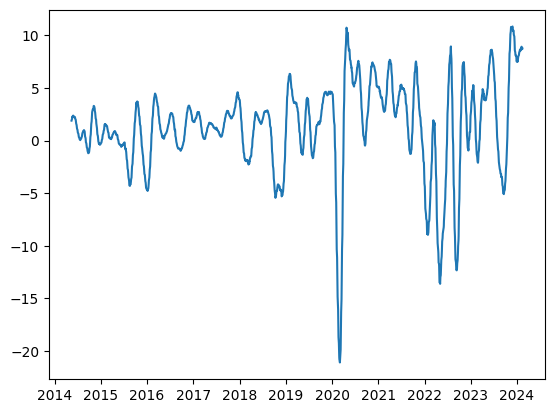

In [169]:
gradient,variance = compute_gradient_variance(df['weighted_moving_average'])
plt.plot(df['DATE'], gradient)

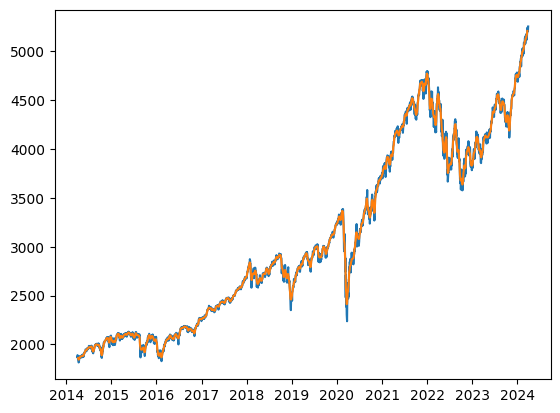

In [149]:
calculate_correlation(df['SP500'], df['weighted_moving_average'])
plt.plot(df['DATE'], df['SP500'])
plt.plot(df['DATE'], df['weighted_moving_average'])

In [184]:
K = [7,30,90,180,360]
L = [1,5,10,20,30,50]


In [185]:
for i in K:
    for k in L:
        correlation = calculate_correlation(df['SP500'], weighted_moving_average(df['SP500'].values, L = k, K = i))
        print(f'with K = {i} and L = {k} correlation is {correlation}')

with K = 7 and L = 1 correlation is 0.9511292404168682
with K = 7 and L = 5 correlation is 0.9513946378724105
with K = 7 and L = 10 correlation is 0.9514687946440858
with K = 7 and L = 20 correlation is 0.9515259990372088
with K = 7 and L = 30 correlation is 0.9515534361545273
with K = 7 and L = 50 correlation is 0.9515830572705111
with K = 30 and L = 1 correlation is 0.8141846640125345
with K = 30 and L = 5 correlation is 0.8153246409467486
with K = 30 and L = 10 correlation is 0.8156610974565937
with K = 30 and L = 20 correlation is 0.815926891429333
with K = 30 and L = 30 correlation is 0.8160561503806927
with K = 30 and L = 50 correlation is 0.816196764356107
with K = 90 and L = 1 correlation is 0.580710198780352
with K = 90 and L = 5 correlation is 0.5825649082401452
with K = 90 and L = 10 correlation is 0.5831819463436749
with K = 90 and L = 20 correlation is 0.5837020066600533
with K = 90 and L = 30 correlation is 0.5839673509081238
with K = 90 and L = 50 correlation is 0.584266

In [190]:
df['weighted_moving_average'] = weighted_moving_average(df['SP500'].values, L = 10, K = 30)

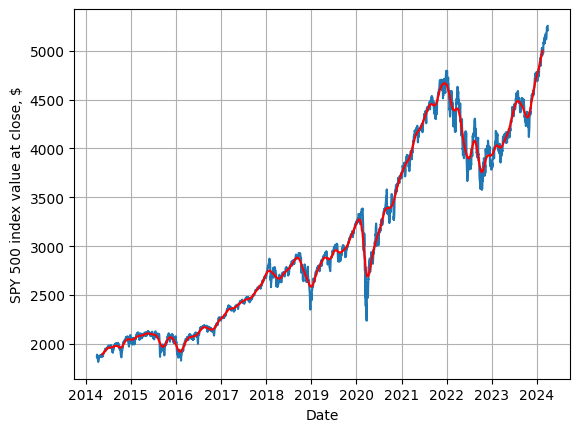

In [193]:
plt.plot(df['DATE'],df['SP500'])
plt.plot(df['DATE'],df['weighted_moving_average'],color='red')
plt.xlabel('Date')
plt.ylabel('SPY 500 index value at close, $')
plt.grid(True)
plt.savefig('report/images/WMA_ex_3.png')

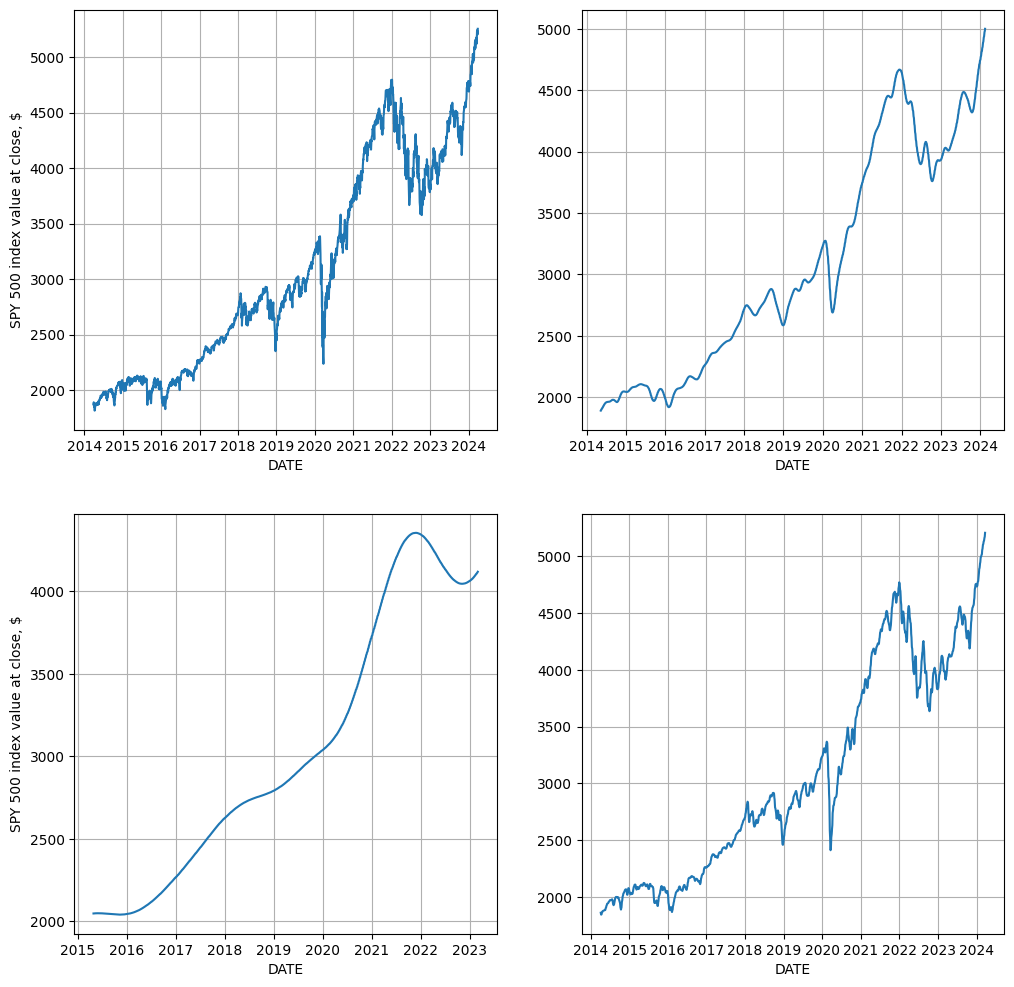

In [200]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
(ax1, ax2), (ax3, ax4) = axes

ax1 = sns.lineplot(x='DATE', y='SP500', data=df, ax=ax1)
ax1.grid(True)
ax1.set_ylabel('SPY 500 index value at close, $')
df['weighted_moving_average'] = weighted_moving_average(df['SP500'].values, L=10, K=30)
ax2 = sns.lineplot(x='DATE', y='weighted_moving_average', data=df, ax=ax2)
ax2.grid(True)
ax2.set_ylabel(' ')
df['weighted_moving_average'] = weighted_moving_average(df['SP500'].values, L=30, K=270)
ax3 = sns.lineplot(x='DATE', y='weighted_moving_average', data=df, ax=ax3)
ax3.grid(True)
ax3.set_ylabel('SPY 500 index value at close, $')
df['weighted_moving_average'] = weighted_moving_average(df['SP500'].values, L=5, K=5)
ax4 = sns.lineplot(x='DATE', y='weighted_moving_average', data=df, ax=ax4)
ax4.grid(True)
ax4.set_ylabel(' ')
plt.savefig('report/images/WMA_ex_1.png')
plt.show()

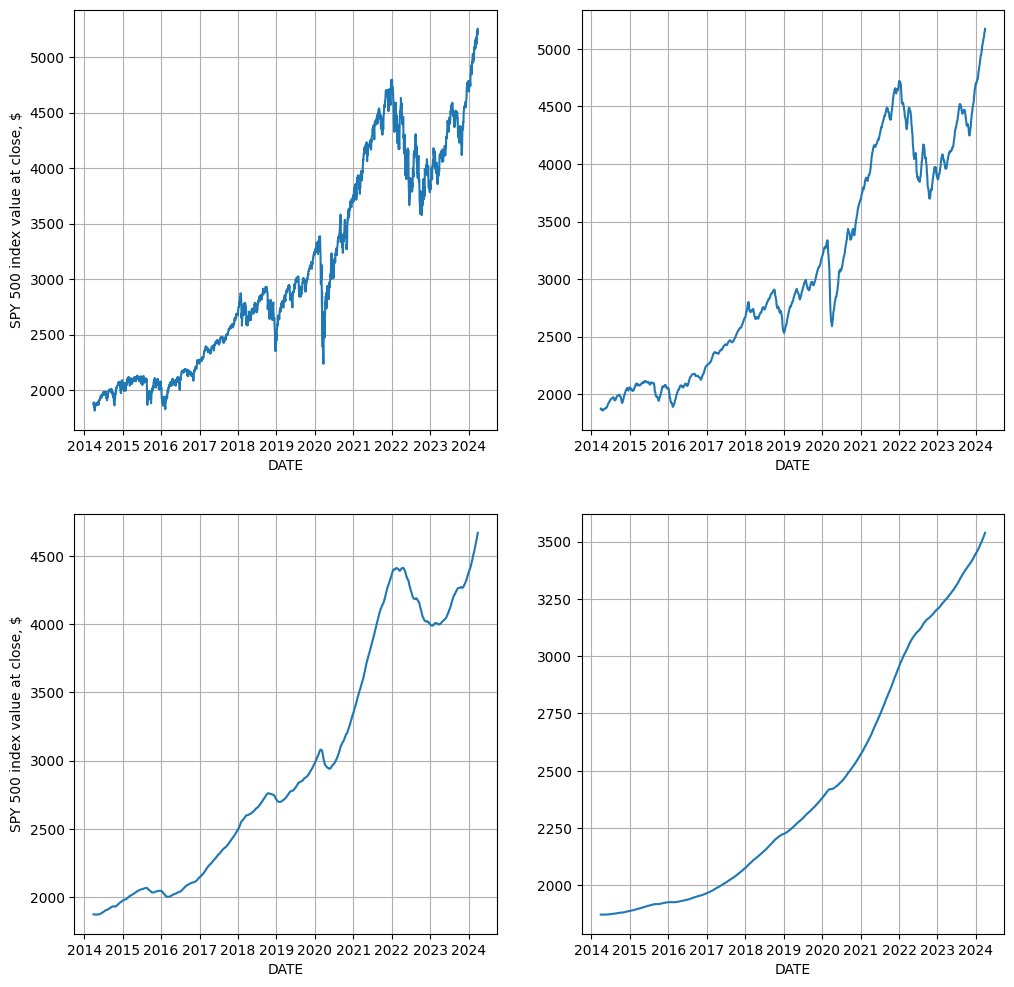

In [201]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
(ax1, ax2), (ax3, ax4) = axes

ax1 = sns.lineplot(x='DATE', y='SP500', data=df, ax=ax1)
ax1.grid(True)
ax1.set_ylabel('SPY 500 index value at close, $')
df['exponential_moving_average'] = exponential_moving_average(df['SP500'].values,0.1)
ax2 = sns.lineplot(x='DATE', y='exponential_moving_average', data=df, ax=ax2)
ax2.grid(True)
ax2.set_ylabel(' ')
df['exponential_moving_average'] = exponential_moving_average(df['SP500'].values, 0.01)
ax3 = sns.lineplot(x='DATE', y='exponential_moving_average', data=df, ax=ax3)
ax3.grid(True)
ax3.set_ylabel('SPY 500 index value at close, $')
df['exponential_moving_average'] = exponential_moving_average(df['SP500'].values, 0.001)
ax4 = sns.lineplot(x='DATE', y='exponential_moving_average', data=df, ax=ax4)
ax4.grid(True)
ax4.set_ylabel(' ')
plt.savefig('report/images/EMA_ex_1.png')
plt.show()

In [202]:
alpha = [0.1,0.08,0.06,0.04,0.02,0.01,0.005,0.001]

for i in alpha:
    correlation = calculate_correlation(df['SP500'], exponential_moving_average(df['SP500'].values, alpha = i))
    gradient,variance = compute_gradient_variance(exponential_moving_average(df['SP500'].values, alpha = i))
    print(f'with alpha = {i} correlation is {correlation} and variance is {variance}')

with alpha = 0.1 correlation is 0.9974569723215679 and variance is 51.678303070006244
with alpha = 0.08 correlation is 0.9967863045294709 and variance is 40.53307282292748
with alpha = 0.06 correlation is 0.9957363386241734 and variance is 29.381880381532334
with alpha = 0.04 correlation is 0.9938182607149061 and variance is 18.438424058046298
with alpha = 0.02 correlation is 0.9886296387034221 and variance is 8.297204999106947
with alpha = 0.01 correlation is 0.9794975049320702 and variance is 3.7201509063510425
with alpha = 0.005 correlation is 0.9678600123677986 and variance is 1.5078842705713378
with alpha = 0.001 correlation is 0.9449819977510896 and variance is 0.2275767127721446


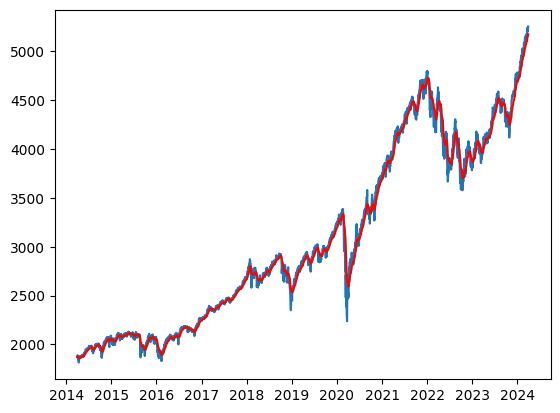

In [203]:
alpha = 0.1
df['exponential_moving_average'] = exponential_moving_average(df['SP500'].values, alpha)
plt.plot(df['DATE'],df['SP500'])
plt.plot(df['DATE'],df['exponential_moving_average'],color='red')


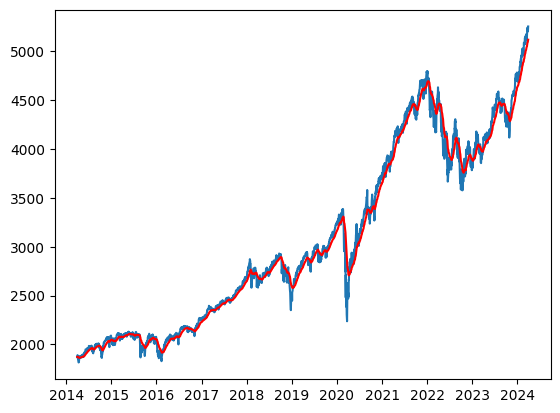

In [209]:
alpha = 0.06
df['exponential_moving_average'] = exponential_moving_average(df['SP500'].values, alpha)
plt.plot(df['DATE'],df['SP500'])
plt.plot(df['DATE'],df['exponential_moving_average'],color='red')


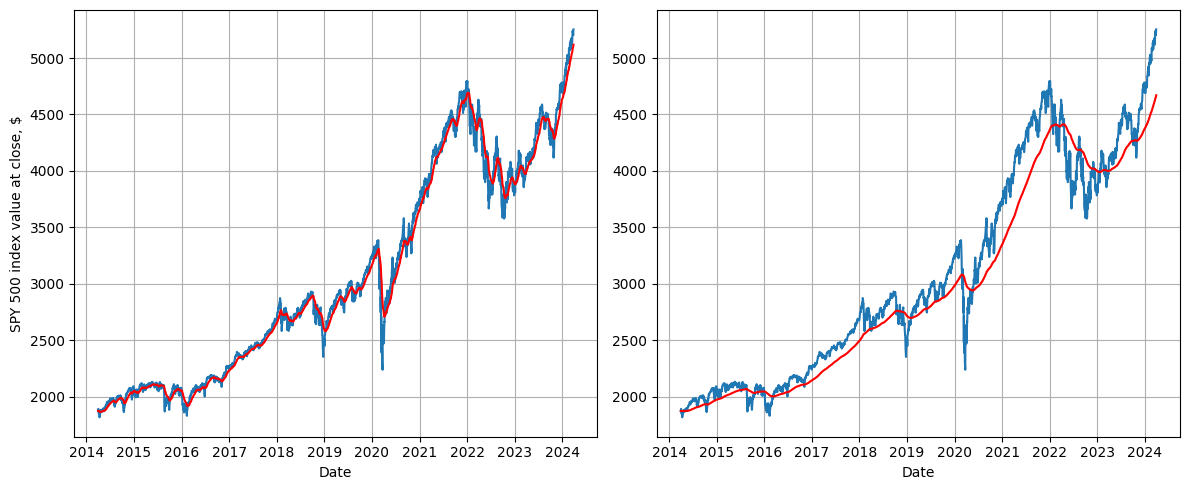

In [215]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

alpha1 = 0.06
df['exponential_moving_average1'] = exponential_moving_average(df['SP500'].values, alpha1)
ax1.plot(df['DATE'], df['SP500'])
ax1.plot(df['DATE'], df['exponential_moving_average1'], color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('SPY 500 index value at close, $')

alpha2 = 0.01
df['exponential_moving_average2'] = exponential_moving_average(df['SP500'].values, alpha2)
ax2.plot(df['DATE'], df['SP500'])
ax2.plot(df['DATE'], df['exponential_moving_average2'], color='red')
ax2.set_xlabel('Date')
plt.savefig('report/images/EMA_ex_2.png')
ax1.grid(True)
ax2.grid(True)
plt.tight_layout()
plt.show()
